In [1]:
!pip install xarray
!pip install pandas
!pip install seaborn
!pip install xarray





  Using cached xarray-2023.5.0-py3-none-any.whl (994 kB)
     |████████████████████████████████| 12.4 MB 19.7 MB/s            
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached contourpy-1.0.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (299 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached Pillow-9.5.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.4

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns


In [15]:
df = pd.read_csv('result.csv')

In [16]:
df

,time,latitude,longitude,BurntArea,NDVI,DCM,LST,WIND,PRECIP,SSR
0,2001-01-01 12:00:00,62.125,-165.625,0.0,-0.126051,19.000000,12775.857,7.739395,7.308507,0.167135
1,2001-01-01 12:00:00,62.125,-165.375,0.0,-0.114740,31.666666,12742.000,6.706646,6.885376,0.157442
2,2001-01-01 12:00:00,62.125,-164.125,0.0,-0.067969,0.000000,12867.200,4.778048,7.764234,0.187972
3,2001-01-01 12:00:00,62.125,-163.875,0.0,-0.088074,0.000000,12822.000,4.759057,8.507772,0.186344
4,2001-01-01 12:00:00,62.125,-163.625,0.0,-0.065140,0.000000,12862.000,4.776716,9.261845,0.184363
...,...,...,...,...,...,...,...,...,...,...
14624154,2015-11-01 12:00:00,-55.125,-69.125,0.0,0.410810,12.366667,14137.500,5.764315,84.634620,5.442083
14624155,2015-11-01 12:00:00,-55.125,-67.875,0.0,0.639253,20.700000,14442.000,7.826408,50.943580,14.107767
14624156,2015-11-01 12:00:00,-55.125,-66.375,0.0,0.713457,17.816668,14258.000,11.787633,38.044840,13.316766
14624157,2015-11-01 12:00:00,-55.375,-69.375,0.0,0.452166,12.885417,14212.000,12.611184,82.557580,7.979514


In [21]:
df2=df.loc[df['BurntArea']>0]

In [22]:
df2.loc[:,'BurntArea'].mean()

1360.7981698028314

In [23]:
df2.to_csv("BAOverZero.csv")

In [32]:
df3=df2.drop(columns=['time'])

In [33]:
df3

,latitude,longitude,BurntArea,NDVI,DCM,LST,WIND,PRECIP,SSR
46499,46.125,39.375,42.870000,0.188361,257.93750,13951.500,2.416967,0.554007,2.610314
47816,45.625,38.125,150.050000,0.316412,415.66666,14061.000,2.617575,1.439043,3.095765
49119,45.125,38.125,235.799990,0.427016,531.37500,14117.250,2.163381,0.493541,3.522644
49120,45.125,38.375,21.439999,0.483403,542.56250,14124.750,2.133087,0.384019,3.553634
49121,45.125,38.625,1307.590000,0.460326,531.43750,14173.750,2.133811,0.315218,3.600156
...,...,...,...,...,...,...,...,...,...
14621218,-37.125,-65.375,128.620000,0.428356,333.43490,15387.833,4.191670,3.216185,22.791370
14621834,-38.625,-64.625,1307.590000,0.432225,383.46667,15413.625,4.071478,0.574636,23.979626
14622140,-39.875,-63.625,42.879997,0.297886,429.25260,15472.000,4.315669,2.768572,24.379108
14622143,-39.875,-62.875,192.920000,0.428787,395.67188,15159.429,4.267161,1.669484,23.866087


In [34]:
corr=df3.corr()

<Axes: >

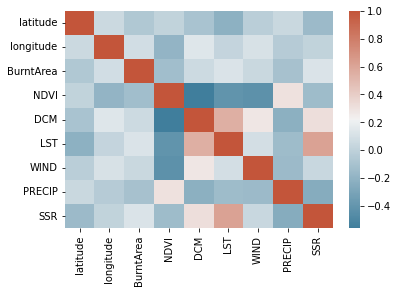

In [37]:
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,cmap=cmap)

In [38]:
df4=df3.loc[(df['LST']>15900)&(df['WIND']>4.55)]

In [39]:
df4.loc[:,'BurntArea'].mean()

2332.2353769752795

<Axes: >

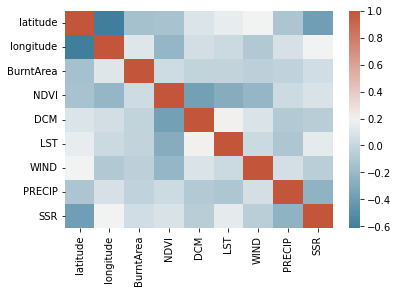

In [40]:
corr2=df4.corr()
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr2,cmap=cmap)